29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


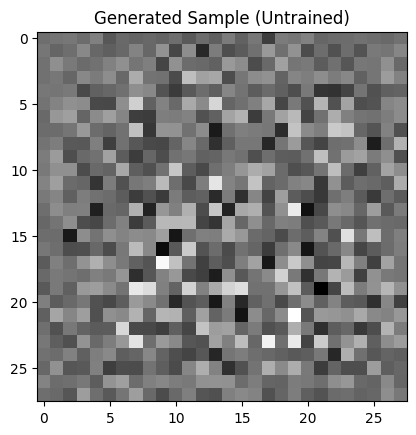

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Discriminator output shape: (1, 1)
Epoch 1, Gen Loss: 1.0267, Disc Loss: 1.1128


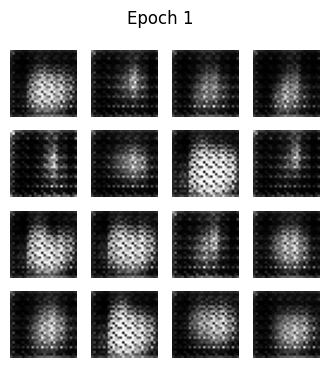

Epoch 2, Gen Loss: 0.8665, Disc Loss: 1.3692


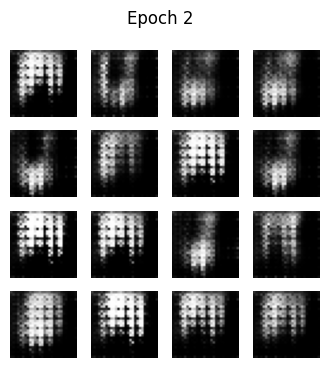

Epoch 3, Gen Loss: 0.7884, Disc Loss: 1.4120


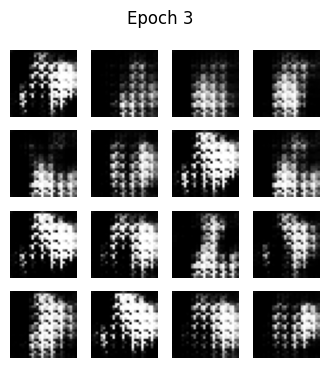

Epoch 4, Gen Loss: 0.7127, Disc Loss: 1.5828


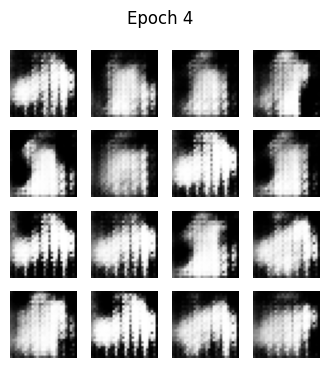

Epoch 5, Gen Loss: 0.8097, Disc Loss: 1.3142


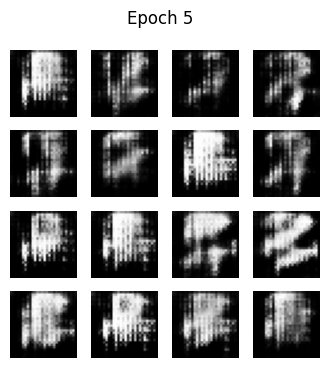

Epoch 6, Gen Loss: 0.7838, Disc Loss: 1.2836


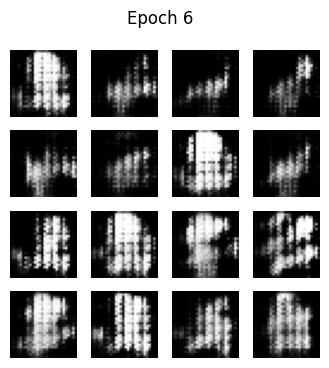

Epoch 7, Gen Loss: 0.9129, Disc Loss: 1.1345


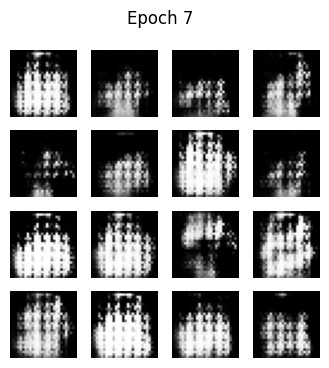

Epoch 8, Gen Loss: 0.8546, Disc Loss: 1.1991


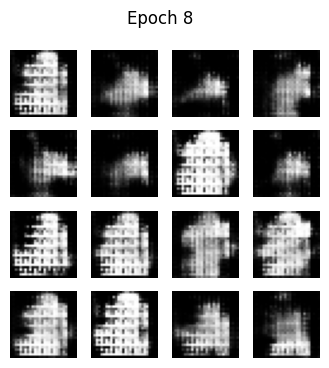

Epoch 9, Gen Loss: 0.9661, Disc Loss: 1.1279


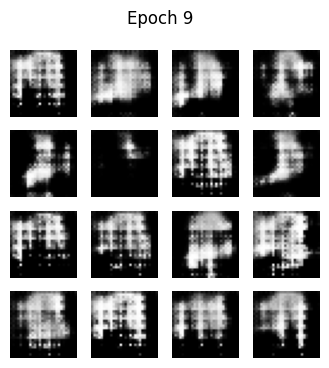

Epoch 10, Gen Loss: 0.9480, Disc Loss: 1.1401


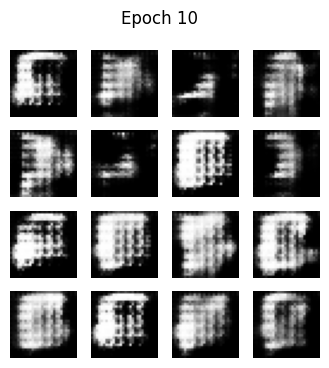

Epoch 11, Gen Loss: 1.0924, Disc Loss: 1.0638


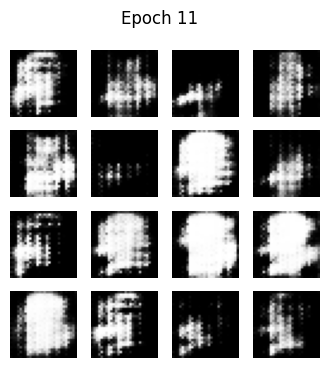

Epoch 12, Gen Loss: 0.9460, Disc Loss: 1.2401


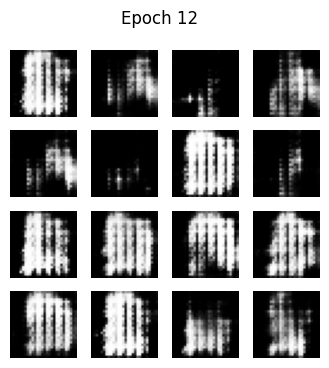

Epoch 13, Gen Loss: 0.9595, Disc Loss: 1.2208


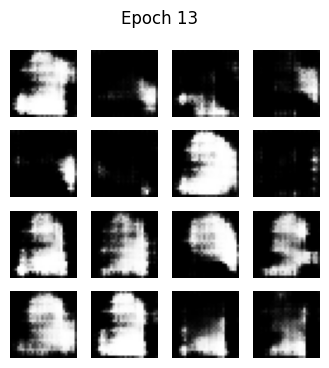

Epoch 14, Gen Loss: 1.0125, Disc Loss: 1.2723


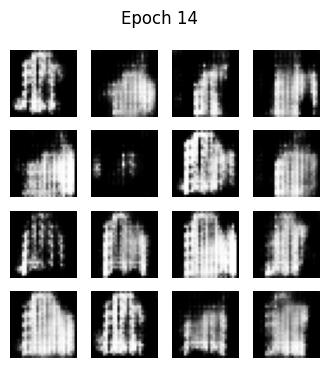

Epoch 15, Gen Loss: 1.4590, Disc Loss: 0.6773


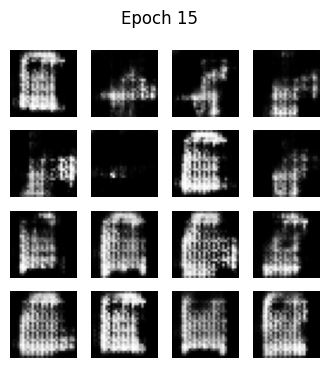

Epoch 16, Gen Loss: 1.6907, Disc Loss: 0.6306


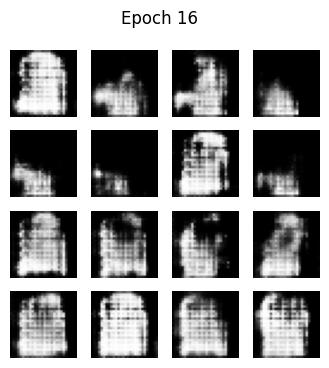

Epoch 17, Gen Loss: 1.7416, Disc Loss: 0.7881


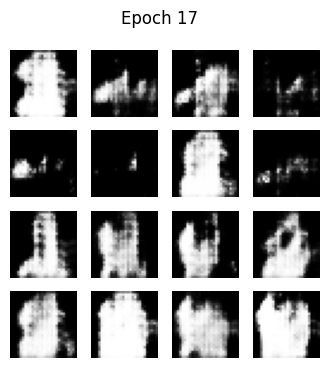

Epoch 18, Gen Loss: 1.4797, Disc Loss: 0.8424


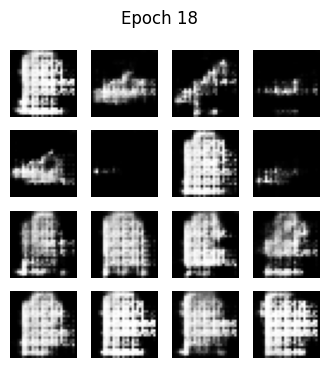

Epoch 19, Gen Loss: 1.6902, Disc Loss: 0.7201


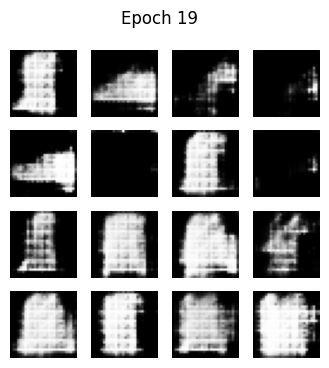

Epoch 20, Gen Loss: 1.6979, Disc Loss: 0.6059


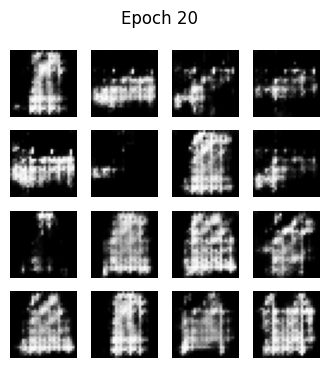

Epoch 21, Gen Loss: 1.5604, Disc Loss: 0.6010


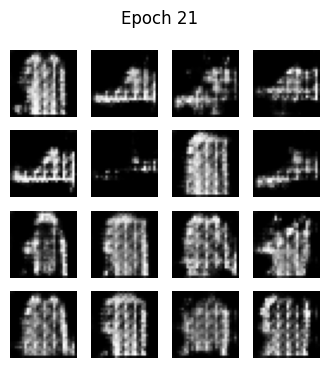

Epoch 22, Gen Loss: 1.5185, Disc Loss: 0.7919


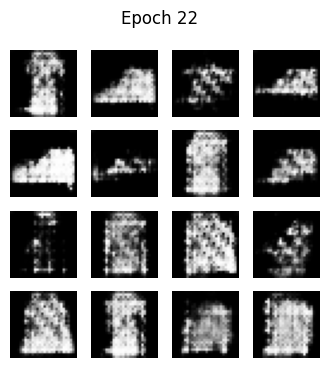

Epoch 23, Gen Loss: 1.3033, Disc Loss: 1.4117


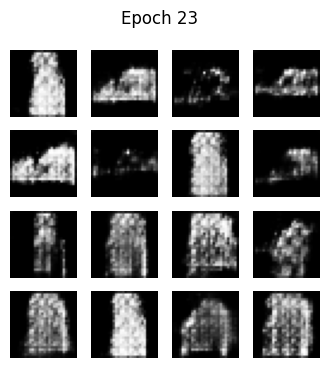

Epoch 24, Gen Loss: 1.7539, Disc Loss: 0.6566


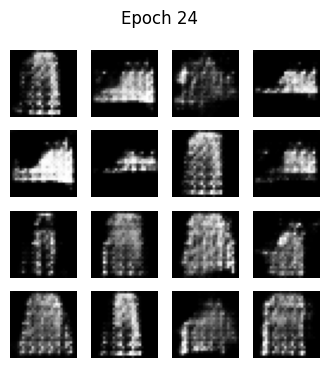

Epoch 25, Gen Loss: 1.4672, Disc Loss: 0.7790


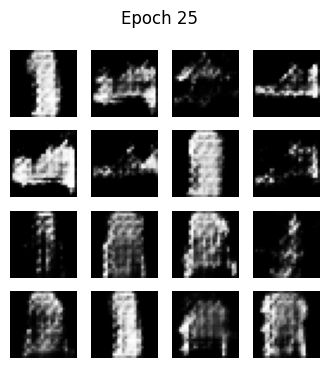

Epoch 26, Gen Loss: 1.4046, Disc Loss: 0.7816


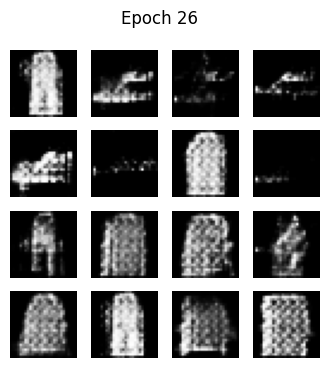

Epoch 27, Gen Loss: 1.5326, Disc Loss: 0.8858


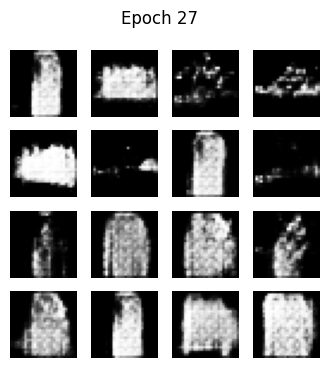

Epoch 28, Gen Loss: 1.8461, Disc Loss: 0.6586


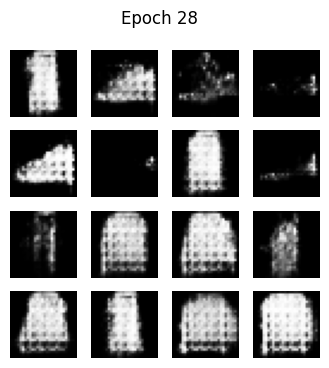

Epoch 29, Gen Loss: 1.5137, Disc Loss: 0.9221


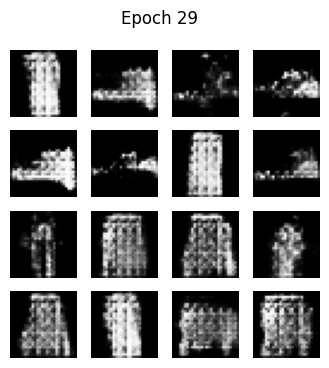

Epoch 30, Gen Loss: 1.3325, Disc Loss: 1.0045


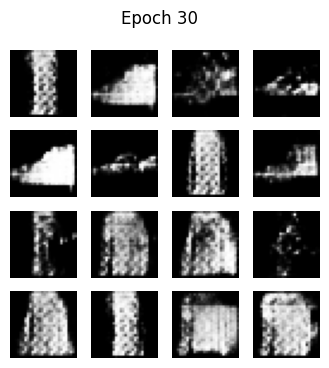

Epoch 31, Gen Loss: 1.7999, Disc Loss: 0.7678


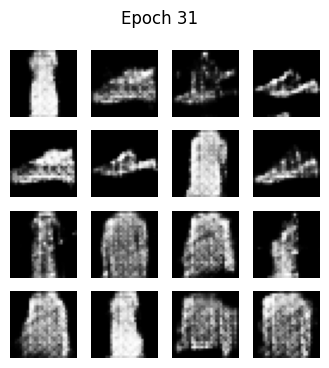

Epoch 32, Gen Loss: 1.4137, Disc Loss: 0.8545


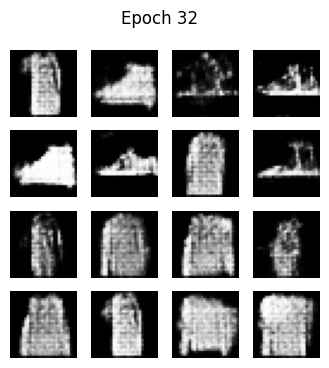

Epoch 33, Gen Loss: 1.6482, Disc Loss: 0.7378


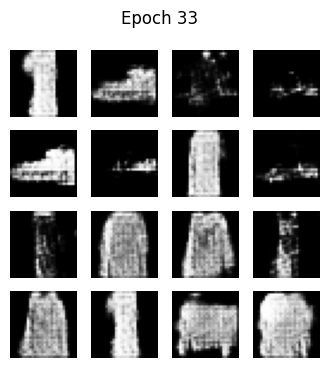

Epoch 34, Gen Loss: 1.3542, Disc Loss: 1.0131


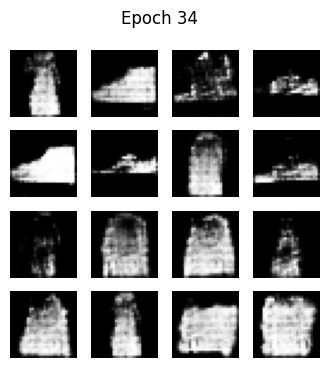

Epoch 35, Gen Loss: 1.9368, Disc Loss: 0.6860


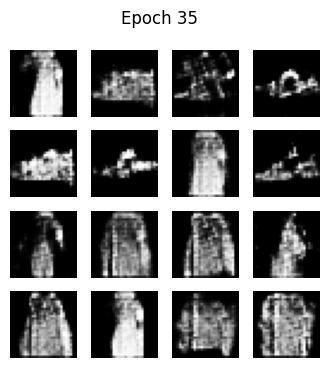

Epoch 36, Gen Loss: 1.8697, Disc Loss: 0.7249


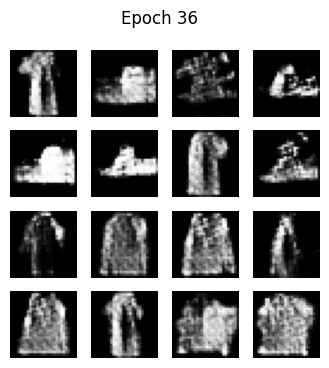

Epoch 37, Gen Loss: 1.5916, Disc Loss: 0.7556


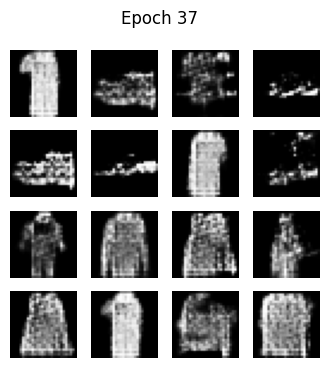

Epoch 38, Gen Loss: 1.5909, Disc Loss: 1.0173


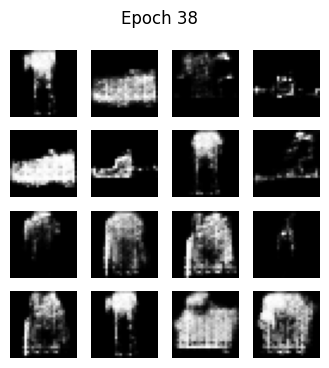

Epoch 39, Gen Loss: 1.5485, Disc Loss: 1.1312


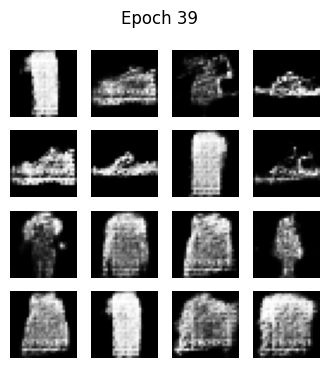

Epoch 40, Gen Loss: 1.5549, Disc Loss: 0.9966


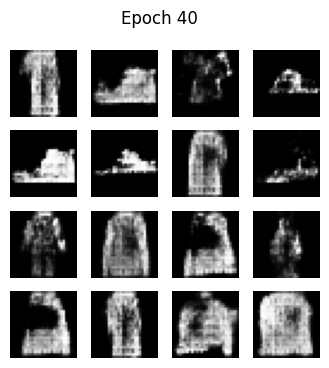

Epoch 41, Gen Loss: 1.1986, Disc Loss: 1.0317


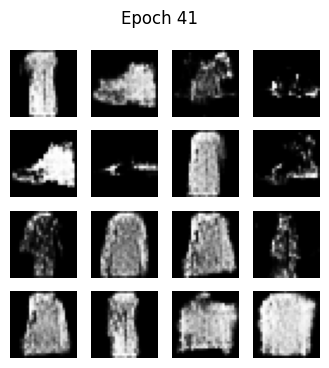

Epoch 42, Gen Loss: 1.5662, Disc Loss: 0.9903


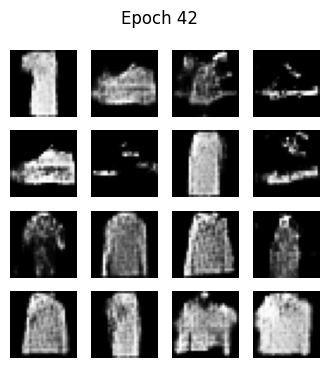

Epoch 43, Gen Loss: 1.4772, Disc Loss: 0.8371


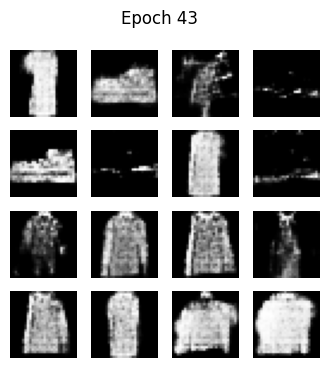

Epoch 44, Gen Loss: 1.2183, Disc Loss: 1.2014


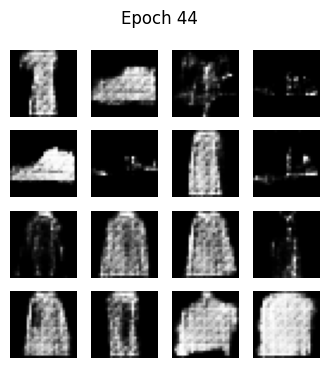

Epoch 45, Gen Loss: 1.5604, Disc Loss: 1.0030


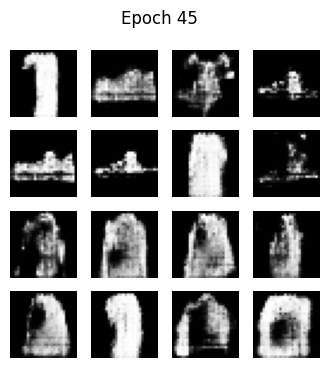

Epoch 46, Gen Loss: 1.3452, Disc Loss: 0.9985


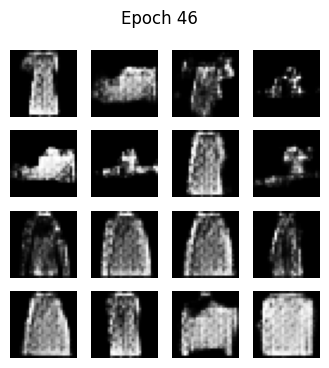

Epoch 47, Gen Loss: 1.3951, Disc Loss: 0.9689


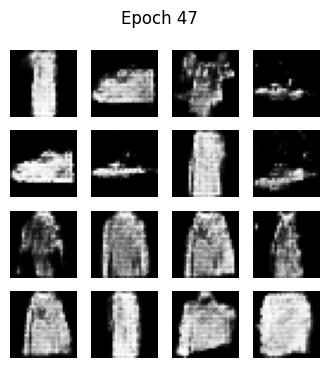

Epoch 48, Gen Loss: 1.2847, Disc Loss: 0.8833


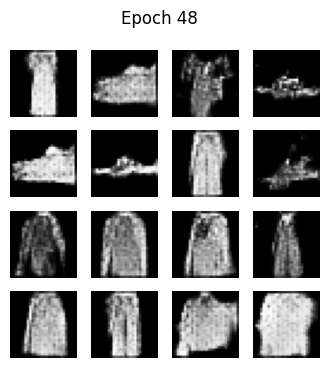

Epoch 49, Gen Loss: 1.1401, Disc Loss: 1.2857


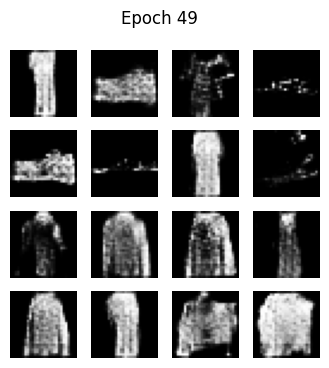

Epoch 50, Gen Loss: 1.3529, Disc Loss: 0.8153


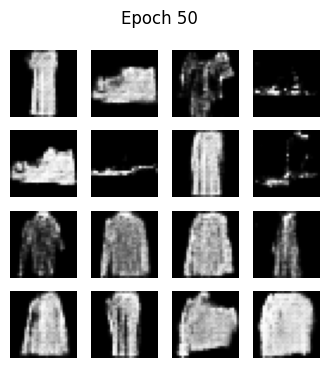

In [2]:
# Generating Fashion Product Images using GAN (TensorFlow/Keras)

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1️ Load and preprocess dataset

(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images to [-1, 1]

train_images = (train_images - 127.5) / 127.5
train_images = np.expand_dims(train_images, axis=-1).astype("float32")

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Shuffle and batch

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# 2️ Build Generator

def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

generator = make_generator_model()

# Test generator

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0] * 127.5 + 127.5, cmap='gray')
plt.title("Generated Sample (Untrained)")
plt.show()

# 3️ Build Discriminator

def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                      input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print("Discriminator output shape:", decision.shape)

# 4️ Define Losses & Optimizers

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# 5️ Training Loop
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Epoch {epoch}")
    plt.show()

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f"Epoch {epoch+1}, Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")
        generate_and_save_images(generator, epoch + 1, seed)

# 6️ Train GAN

train(train_dataset, EPOCHS)
